## RandomForestRegressor

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')



In [5]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


<Axes: >

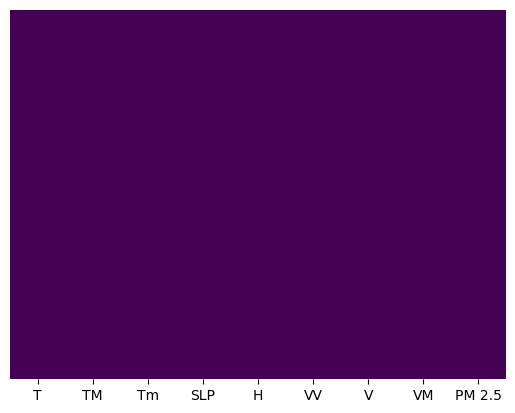

In [6]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df=df.dropna()

In [8]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [9]:
## check null values
X.isnull()

,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1088,False,False,False,False,False,False,False,False
1089,False,False,False,False,False,False,False,False
1090,False,False,False,False,False,False,False,False
1091,False,False,False,False,False,False,False,False


In [10]:
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1088    False
1089    False
1090    False
1091    False
1092    False
Name: PM 2.5, Length: 1092, dtype: bool

In [11]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


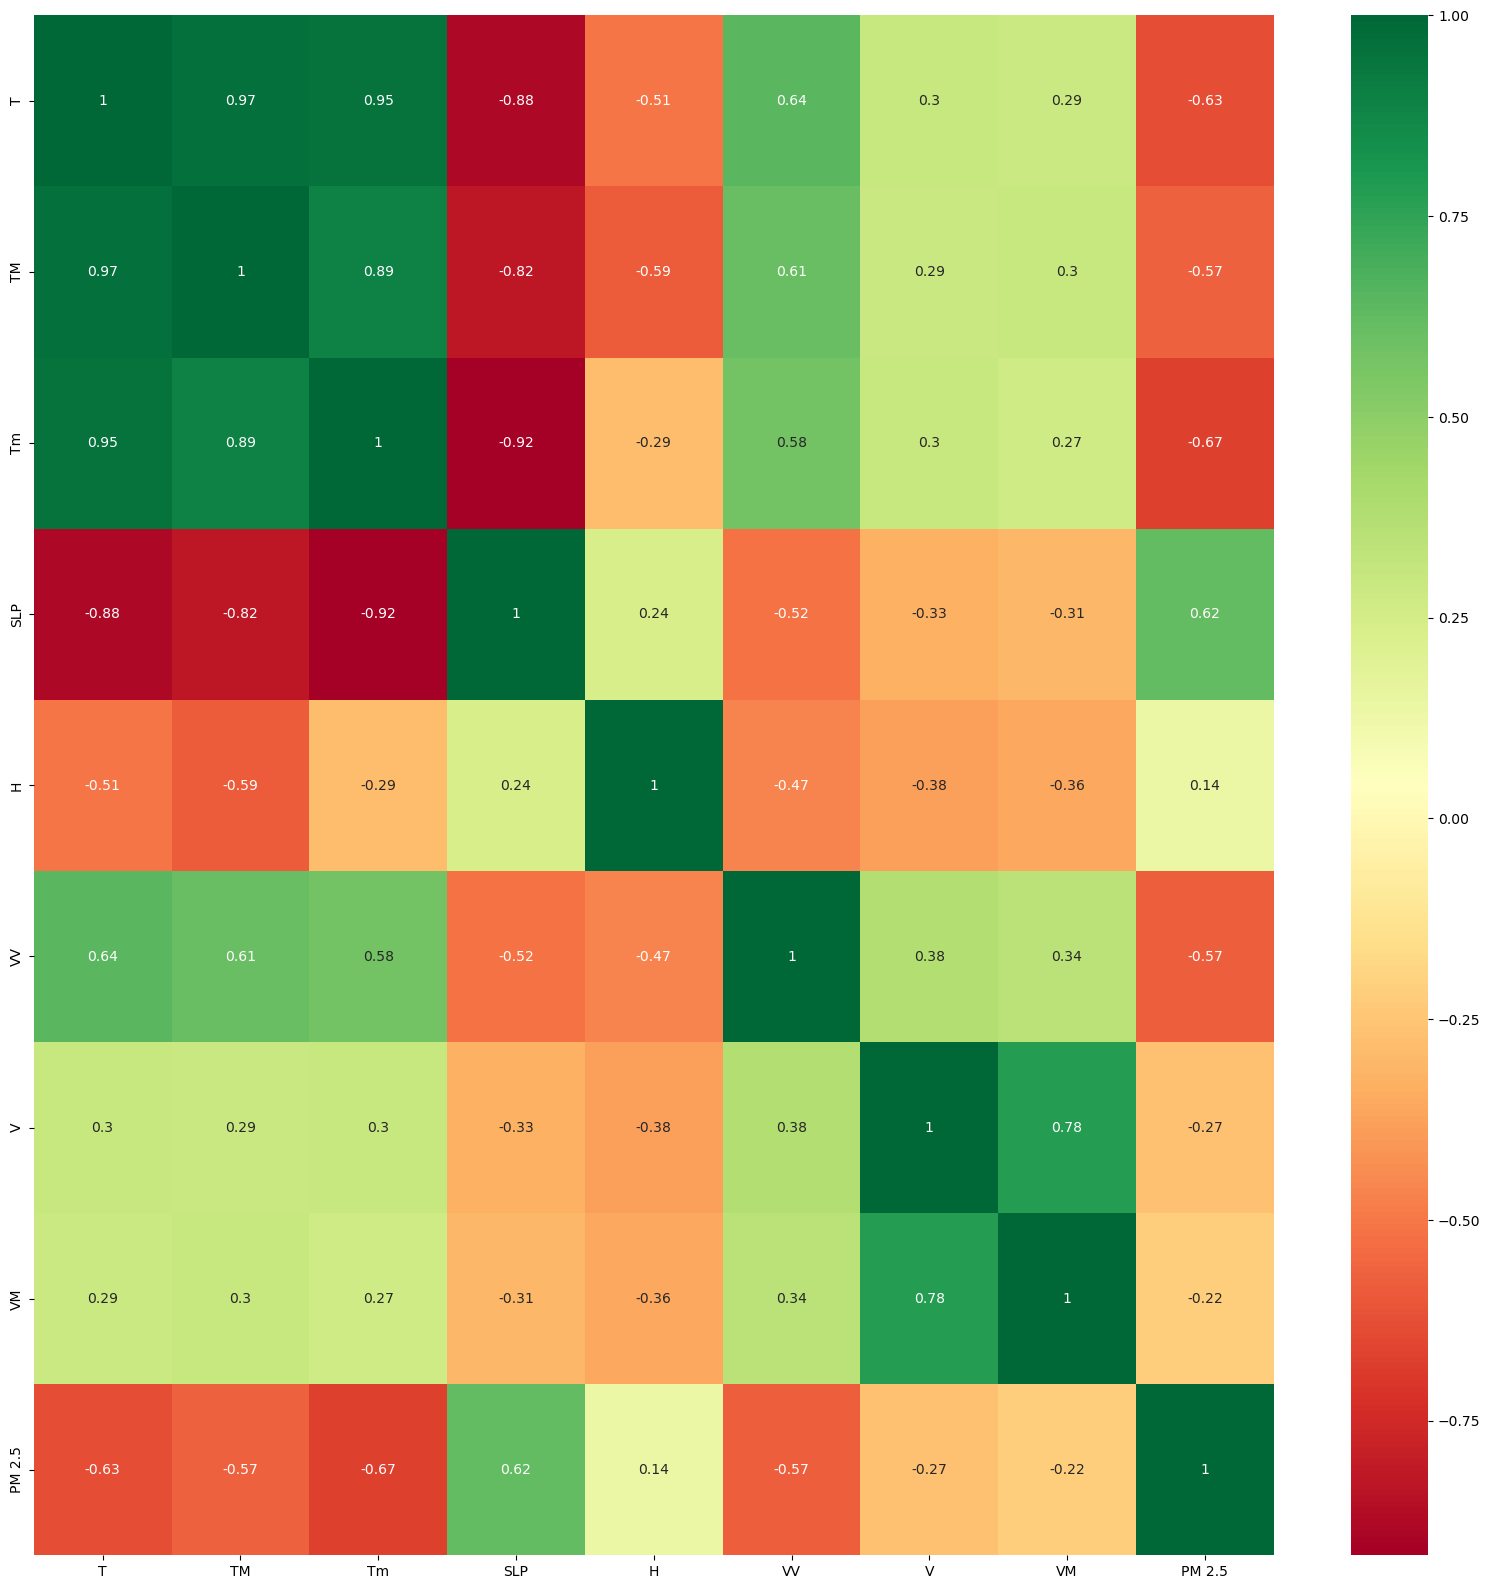

In [12]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [14]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [15]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [16]:
print(model.feature_importances_)

[0.16098939 0.09445187 0.24429611 0.14209245 0.08530798 0.17644867
 0.05258714 0.04382639]


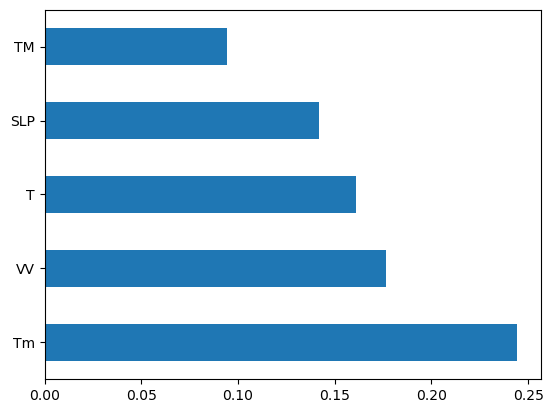

In [17]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Linear Regression

C:\Users\rahim\AppData\Local\Temp\ipykernel_7140\476133659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='PM 2.5', ylabel='Density'>

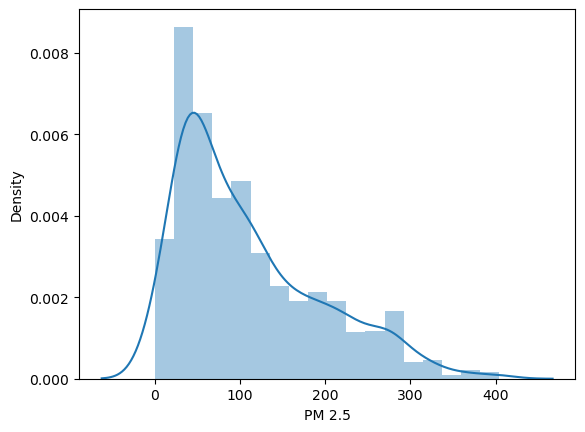

In [19]:
sns.distplot(y)

### Train Test split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [24]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9729825141493182


In [25]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.7853939695980012


In [26]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [27]:
score.mean()

0.7341585686808286

#### Model Evaluation

In [29]:
prediction=regressor.predict(X_test)

C:\Users\rahim\AppData\Local\Temp\ipykernel_7140\1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='PM 2.5', ylabel='Density'>

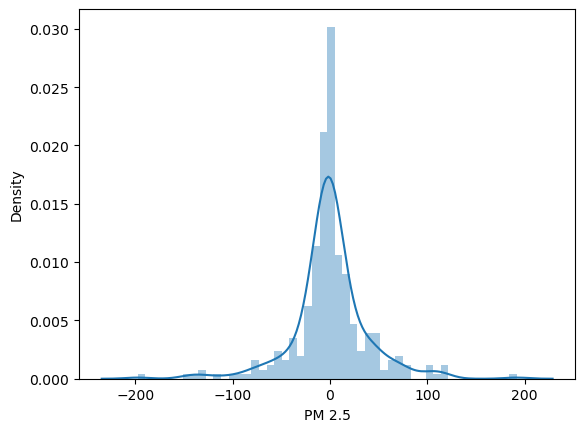

In [30]:
sns.distplot(y_test-prediction)

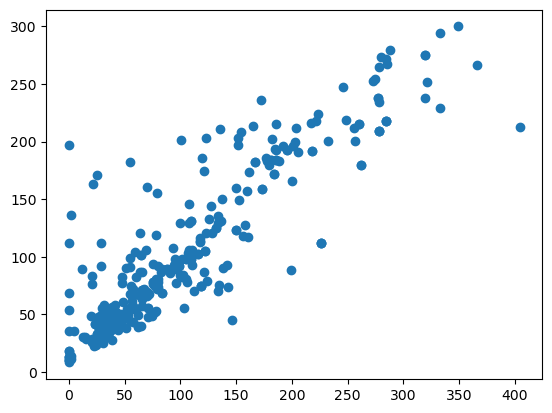

In [31]:
plt.scatter(y_test,prediction)

## Hyperparameter Tuning

In [33]:
RandomForestRegressor()

RandomForestRegressor()

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the random forest model
rf = RandomForestRegressor()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Random grid search parameters
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

print(random_grid)

# Random search of parameters, using 5-fold cross-validation,
# search across 100 different combinations
rf_random = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=random_grid,
    scoring='neg_mean_squared_error', 
    n_iter=100, 
    cv=5, 
    verbose=2, 
    random_state=42, 
    n_jobs=1
)

# Fit the random search model
rf_random.fit(X_train, y_train)

print("Best Parameters found: ", rf_random.best_params_)
print("Best Score: ", rf_random.best_score_)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['sqrt', 'log2', None], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=600; total time=   0.5s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimator

In [37]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [38]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 30}

In [39]:
rf_random.best_score_

-1528.5876222647112

In [40]:
predictions=rf_random.predict(X_test)

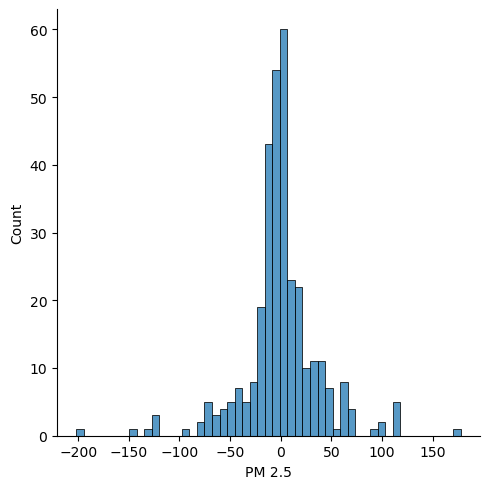

In [41]:
sns.displot(y_test-predictions)

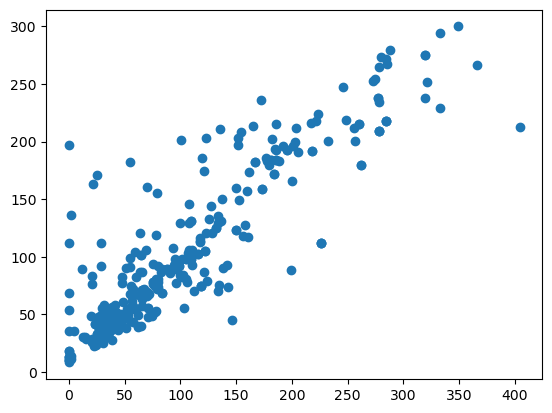

In [42]:
plt.scatter(y_test,prediction)

In [43]:
from sklearn import metrics

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 24.108524813685644
MSE: 1503.6296942333393
RMSE: 38.77666429997995


In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 23.995901930894313
MSE: 1537.3949787785298
RMSE: 39.20962864882209


In [46]:
import pickle 

In [47]:
file_path = 'pickle files/random_forest_regression_model.pkl'
with open(file_path, 'wb') as file:
    # Dump information to that file
    pickle.dump(rf_random, file)

print(f"Data has been saved to {file_path}")

Data has been saved to pickle files/random_forest_regression_model.pkl
